In [6]:
# importing the dataset
dataset = read.csv("Social_Network_Ads.csv")
head(dataset)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [19]:
# removing the unwanted variable
dataset = dataset[, 3:5]

In [20]:
#Checking the head of the dataset
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [21]:
#spliting the dataset into training and testing set
library(caTools)
spliter = sample.split(dataset$Purchased,SplitRatio = .75)
training_set = subset(dataset, spliter == TRUE)
test_set = subset(dataset, spliter == FALSE)

In [23]:
# featue scaling
training_set[,1:2] = scale(x = training_set[,1:2])
test_set[,1:2] = scale(x = test_set[,1:2])

In [26]:
#building the model
classifier = glm(formula = Purchased ~., family = binomial, data = training_set)

In [27]:
summary(classifier)


Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9941  -0.5288  -0.1379   0.3636   2.3772  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1744     0.1998  -5.878 4.16e-09 ***
Age               2.5470     0.3241   7.858 3.90e-15 ***
EstimatedSalary   1.2935     0.2183   5.926 3.10e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 202.65  on 297  degrees of freedom
AIC: 208.65

Number of Fisher Scoring iterations: 6


In [34]:
#predicting the test set data
y_prob = predict(classifier, type = 'response', newdata = test_set[-3])

In [35]:
head(y_prob)

12          13          14          18          28          29 
0.009459828 0.007586542 0.011790176 0.286628068 0.433430032 0.014165944

In [36]:
y_pred = ifelse(y_prob > 0.5, 1, 0)

In [37]:
y_pred

12  13  14  18  28  29  32  36  40  43  50  53  59  60  71  73  83  85  90  91 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 93  98 102 105 122 134 135 142 143 145 150 151 153 154 156 157 162 163 167 175 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0 
176 177 181 186 188 202 203 207 208 212 214 219 222 224 226 227 236 237 238 242 
  0   0   0   0   0   1   1   1   1   1   0   1   0   1   0   1   1   0   0   0 
244 253 255 258 259 265 267 268 269 281 283 287 288 290 302 303 306 315 319 320 
  1   1   1   0   1   1   0   0   1   1   0   0   1   0   1   1   0   0   0   0 
327 329 333 338 344 350 358 361 363 372 375 376 379 382 383 385 392 393 397 399 
  0   1   0   0   1   0   0   1   1   1   0   0   1   1   1   1   0   0   1   0

In [39]:
#building a confusion matrix
cm = table(test_set[,3], y_pred)

In [40]:
cm

   y_pred
     0  1
  0 59  5
  1 11 25

In [45]:
#install.packages("ElemStatLearn")

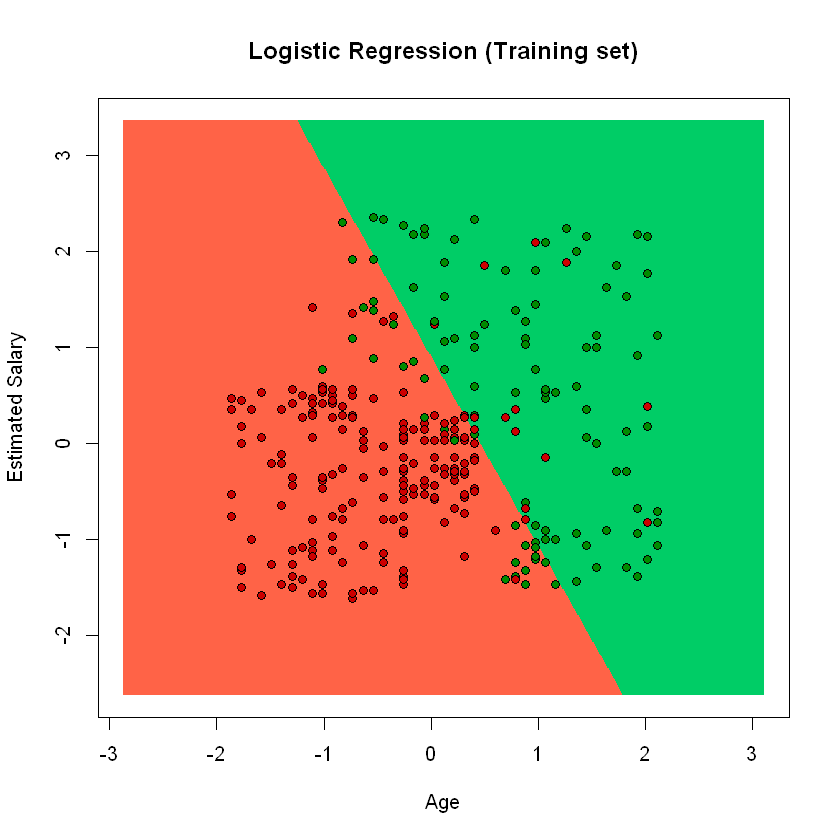

In [47]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

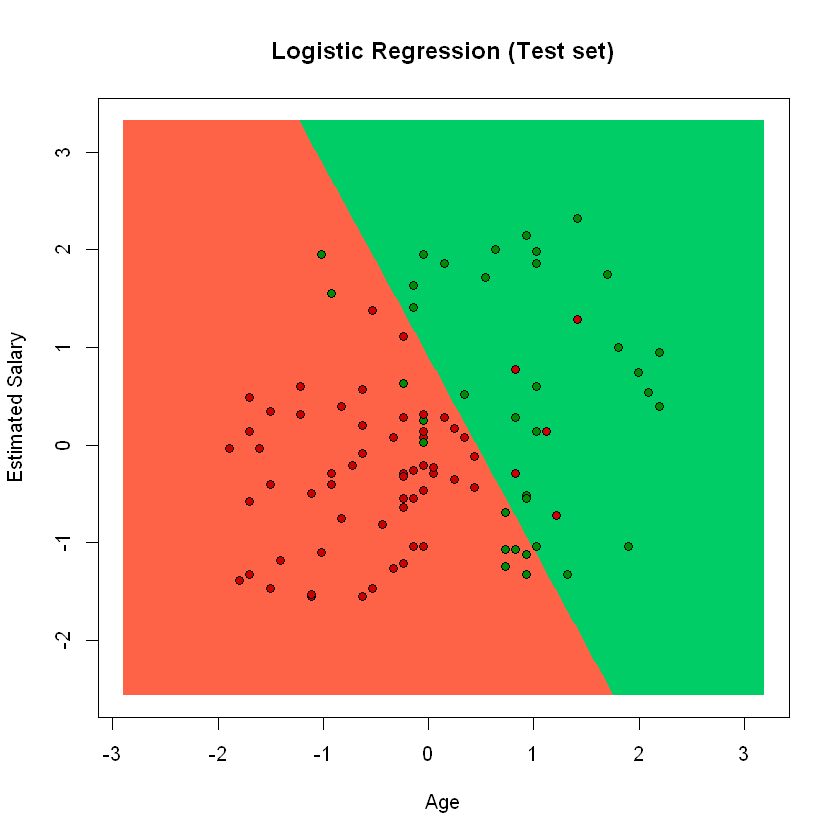

In [48]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))